## OBJECTIVES:

In this project, I will be cleaning and analysing dataset on Amazon's Top 50 bestselling books from 2009 to 2019 in other to visualize:

1. The best selling book of the decade
2. The percentage of fiction to non-fiction
3. Trends over the year
4. Top 10 authors according to reviews

#### IMPORTING NECESSARY LIBRARIES

In [167]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### IMPORTING THE DATASET

In [168]:
amazon_books = pd.read_csv('bestsellers_with_categories.csv')

In [169]:
amazon_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [170]:
 amazon_books.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


##### Shape of the dataset 

In [171]:
amazon_books.shape

(550, 7)

##### Information on data type of each column

In [172]:
amazon_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


The dataset consists of 3 objects, 3 integers and 1 float datatype.

##### Checking for empty cells

In [173]:
amazon_books.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There are no empty cells.

##### Names of the columns

In [174]:
amazon_books.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

##### Summary of the dataset ie descriptive statistics

In [175]:
amazon_books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Exploratory Data Analysis

In this section, I will be answering and visualizing the objective questions

## 1. Best Selling Book of the Decade

In [176]:
amazon_books[['Name','User Rating', 'Author', 'Year']].groupby(by=['Name', 'Author'])\
.mean().sort_values(by='User Rating',ascending=False)\
.head(10)

,,User Rating,Year
Name,Author,,
Hamilton: The Revolution,Lin-Manuel Miranda,4.9,2016.0
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2),Rush Limbaugh,4.9,2014.0
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",J.K. Rowling,4.9,2016.0
"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",J.K. Rowling,4.9,2017.0
"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",J. K. Rowling,4.9,2019.0
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,2016.0
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),Dav Pilkey,4.9,2018.5
"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2018.0
Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),Rush Limbaugh,4.9,2013.0


#### The Best selling book of the decade is 'Hamilton: The Revolution' authored by Lin-Manuel Miranda with average user rating of 4.9 and ranked as bestseller in 2016.

..............................................................................................................................................................................................................................................................

## 2. Visualizing the percentage of fiction to non-fiction

Counter({'Non Fiction': 310, 'Fiction': 240})
             Name  Author  User Rating  Reviews  Price  Year
Genre                                                       
Fiction       240     240          240      240    240   240
Non Fiction   310     310          310      310    310   310


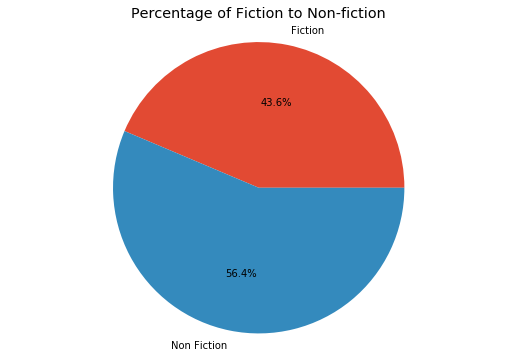

In [177]:
from collections import Counter
print (Counter(amazon_books['Genre']))
title_genre =  amazon_books.groupby('Genre').agg('count')
print(title_genre)
genre_labels = title_genre.Name.sort_values().index
genre_counts = title_genre.Name.sort_values()
fig = plt.figure(figsize = (9,6))
genre_types = plt.pie(genre_counts, labels = genre_labels, autopct = '%1.1f%%', shadow = False)
plt.title('Percentage of Fiction to Non-fiction')
plt.axis('equal')

plt.show()

#### The percentage of Fiction books is 43.6% while that of Non-fiction is 56.4%

..............................................................................................................................................................................................................................................................

## 3. Trends over the year
##### i. Checking the trend of fiction and nonfiction on best sellers book list over the years

First, I'll create an empty list to contain the number of fiction and non-fiction books over the years. Next, looping through the years in a for loop statement, the number of the fiction and non fiction books is then appended into the empty list. 

In [178]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_fiction = []
for i in year:
    fiction = amazon_books[(amazon_books["Year"] == i) & (amazon_books["Genre"] == "Fiction")]
    num_fiction.append(len(fiction))
df_fiction = pd.DataFrame({"Year": year,"Number of Fiction": num_fiction})
print(df_fiction)

    Year  Number of Fiction
0   2009                 24
1   2010                 20
2   2011                 21
3   2012                 21
4   2013                 24
5   2014                 29
6   2015                 17
7   2016                 19
8   2017                 24
9   2018                 21
10  2019                 20


In [179]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_nonfiction = []
for i in year:
    non_fiction = amazon_books[(amazon_books["Year"] == i) & (amazon_books["Genre"] == "Non Fiction")]
    num_nonfiction.append(len(non_fiction))
df_nonfiction = pd.DataFrame({"Year": year,"Number of Non-Fiction": num_nonfiction})
print(df_nonfiction)

    Year  Number of Non-Fiction
0   2009                     26
1   2010                     30
2   2011                     29
3   2012                     29
4   2013                     26
5   2014                     21
6   2015                     33
7   2016                     31
8   2017                     26
9   2018                     29
10  2019                     30


In [180]:
#Merging both dataframes
df_nonfiction["Number of Fiction"] = df_fiction["Number of Fiction"]

#Renaming the dataframe
df_genre = df_nonfiction.copy()
print(df_genre)

    Year  Number of Non-Fiction  Number of Fiction
0   2009                     26                 24
1   2010                     30                 20
2   2011                     29                 21
3   2012                     29                 21
4   2013                     26                 24
5   2014                     21                 29
6   2015                     33                 17
7   2016                     31                 19
8   2017                     26                 24
9   2018                     29                 21
10  2019                     30                 20


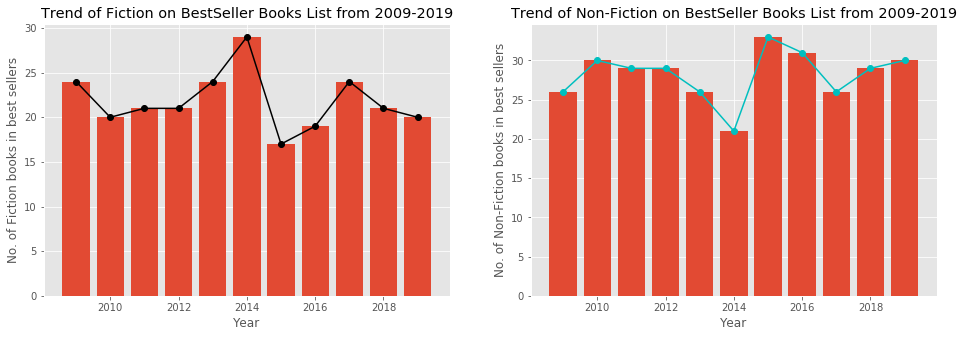

In [181]:
#Visualizing the trend
#I will use the 'ggplot' function to style the bar chart

#for fiction
plt.style.use("ggplot")
plt.figure(figsize=(16,5)) 
plt.subplot(1,2,1)
plt.bar(x = df_genre["Year"],height=df_genre["Number of Fiction"])
plt.plot(df_genre["Year"],df_genre["Number of Fiction"],"-ok")
plt.title("Trend of Fiction on BestSeller Books List from 2009-2019")
plt.xlabel("Year")
plt.ylabel("No. of Fiction books in best sellers")

#for non-fiction
plt.subplot(1,2,2)
plt.bar(x = df_genre["Year"],height=df_genre["Number of Non-Fiction"])
plt.plot(df_genre["Year"],df_genre["Number of Non-Fiction"],"-oc")
plt.title("Trend of Non-Fiction on BestSeller Books List from 2009-2019")
plt.xlabel("Year")
plt.ylabel("No. of Non-Fiction books in best sellers")
plt.show()

**The most and least number of fiction books in the best sellers list was in 2014 and 2015 respectively. The reverse was the case for the non-fiction books.**

..............................................................................................................................................................................................................................................................

##### ii. Trend of average reviews over the years

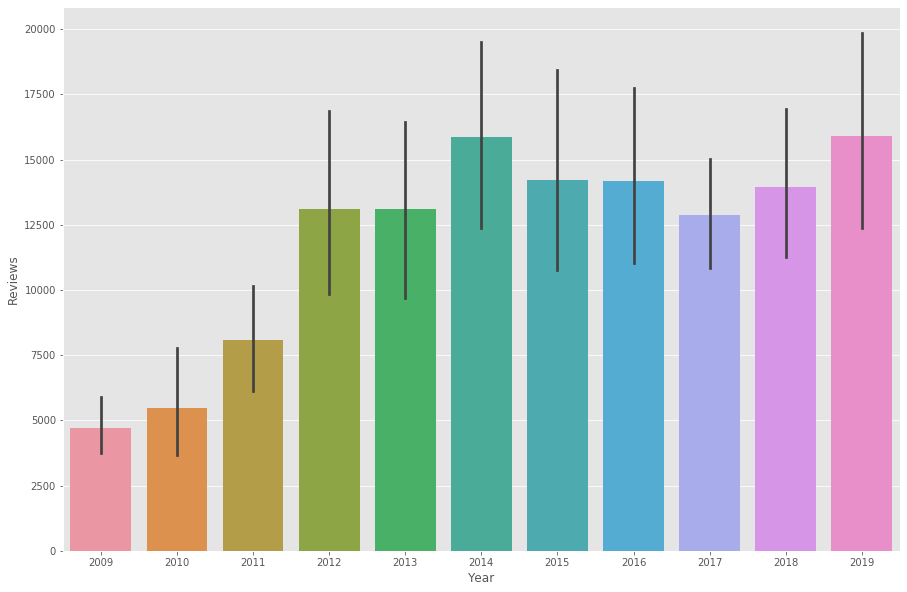

In [182]:
plt.figure(figsize = (15,10))
sns.barplot(y = amazon_books['Reviews'], x= amazon_books['Year'],data = amazon_books)
plt.show()

## 4. Top 10 Authors by Reviews

AxesSubplot(0.125,0.125;0.775x0.755)


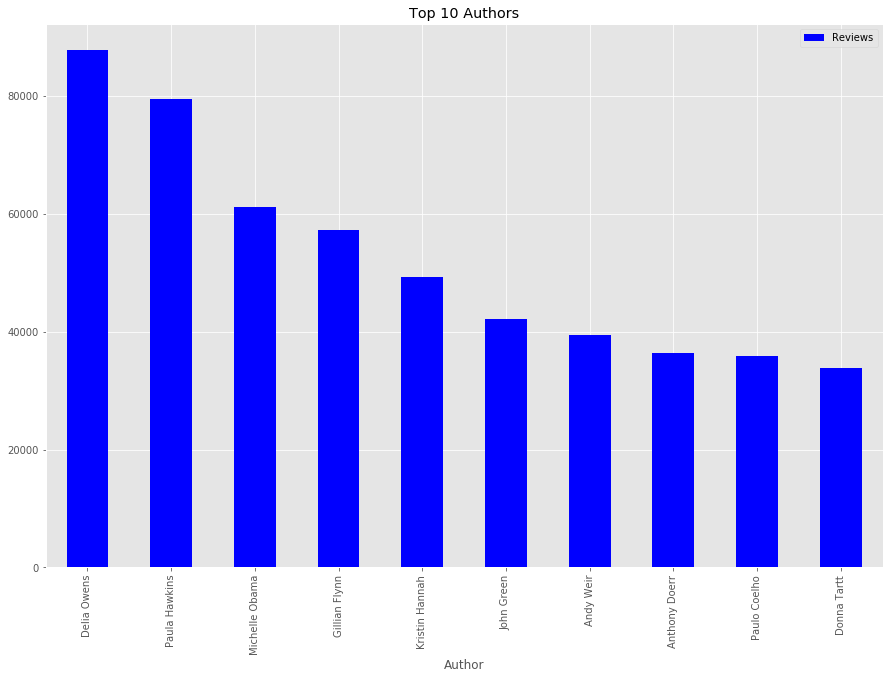

In [183]:
top10_authors = amazon_books[['Author', 'Reviews']].groupby(by='Author').mean().sort_values(by='Reviews',ascending=False)\
.head(10)\
.plot(kind = 'bar', title = 'Top 10 Authors', color= 'blue', figsize= (15,10))
print(top10_authors)

Delia Owens had the most reviews in the decade.